In [ ]:
!pip install torchviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 62.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 32.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 85.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
from torchviz import make_dot
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt
from IPython.display import Image

In [ ]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Prodigy infotech/animals'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
print("✅ Dataset Loaded Successfully")

/content/drive/MyDrive/Prodigy infotech/animals/dog/00505-3846168667.png
/content/drive/MyDrive/Prodigy infotech/animals/dog/00515-3846168677.png
/content/drive/MyDrive/Prodigy infotech/animals/dog/00514-3846168676.png
/content/drive/MyDrive/Prodigy infotech/animals/dog/00511-3846168673.png
/content/drive/MyDrive/Prodigy infotech/animals/dog/00510-3846168672.png
/content/drive/MyDrive/Prodigy infotech/animals/dog/00513-3846168675.png
/content/drive/MyDrive/Prodigy infotech/animals/dog/00517-3846168679.png
/content/drive/MyDrive/Prodigy infotech/animals/dog/00516-3846168678.png
/content/drive/MyDrive/Prodigy infotech/animals/dog/00518-3846168680.png
/content/drive/MyDrive/Prodigy infotech/animals/dog/00512-3846168674.png
/content/drive/MyDrive/Prodigy infotech/animals/dog/00519-3846168681.png
/content/drive/MyDrive/Prodigy infotech/animals/dog/00503-3846168665.png
/content/drive/MyDrive/Prodigy infotech/animals/dog/00500-3846168662.png
/content/drive/MyDrive/Prodigy infotech/animals/dog

In [ ]:
class CatDogDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data = ImageFolder(data_dir, transform=transform)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

    @property
    def classes(self):
        return self.data.classes

In [ ]:
transform = transforms.Compose([
    transforms.Resize((250,250)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
])

eval_transform = transforms.Compose([
    transforms.Resize((250,250)),
    transforms.ToTensor(),
])

dataset_path = '/content/drive/MyDrive/Prodigy infotech/animals'
full_dataset = CatDogDataset(dataset_path, transform)
train_size = int(0.8 * len(full_dataset))
eval_size = len(full_dataset) - train_size
dataset, eval_dataset = random_split(full_dataset, [train_size, eval_size])


target_to_class = {
    0: "Cat",
    1: "Dog"
}

In [ ]:
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

train_size = int(0.9 * len(dataset))
test_size = len(dataset) - train_size

train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True, num_workers=2)
eval_loader = DataLoader(eval_dataset, batch_size=200, shuffle=True, num_workers=2)

In [ ]:
print('Eval Data')

for images, labels in eval_loader:
    unique_labels, counts = labels.unique(return_counts=True)

    for label, count in zip(unique_labels, counts):
        print(f"{target_to_class[int(label.item())]}: {count.item()} images")

    break

print('\nTrain Data')

for images, labels in train_loader:
    unique_labels, counts = labels.unique(return_counts=True)

    for label, count in zip(unique_labels, counts):
        print(f"{target_to_class[int(label.item())]}: {count.item()} images")

    break

Eval Data
Cat: 104 images
Dog: 96 images

Train Data
Cat: 27 images
Dog: 37 images


In [ ]:
class CatDogClassifier(nn.Module):
    def __init__(self):
        super(CatDogClassifier, self).__init__()



        # 1st Conv Block
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(64)
        self.conv2 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.pool1 = nn.MaxPool2d(2, 2)

        # 2nd Conv Block
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.conv4 = nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1)
        self.bn4 = nn.BatchNorm2d(128)
        self.pool2 = nn.MaxPool2d(2, 2)

        # 3rd Conv Block
        self.conv5 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.bn5 = nn.BatchNorm2d(256)
        self.conv6 = nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1)
        self.bn6 = nn.BatchNorm2d(256)
        self.pool3 = nn.MaxPool2d(2, 2)

        # Fully Connected Layers
        self.fc1 = nn.Linear(256 * 3 * 3, 256)
        self.fc2 = nn.Linear(256, 1)

    def forward(self, x):
        x = self.pool1(F.relu(self.bn1(self.conv1(x))))
        x = self.pool1(F.relu(self.bn2(self.conv2(x))))

        x = self.pool2(F.relu(self.bn3(self.conv3(x))))
        x = self.pool2(F.relu(self.bn4(self.conv4(x))))

        x = self.pool3(F.relu(self.bn5(self.conv5(x))))
        x = self.pool3(F.relu(self.bn6(self.conv6(x))))

        x = x.view(-1, 256 * 3 * 3)
        x = F.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))

        return x

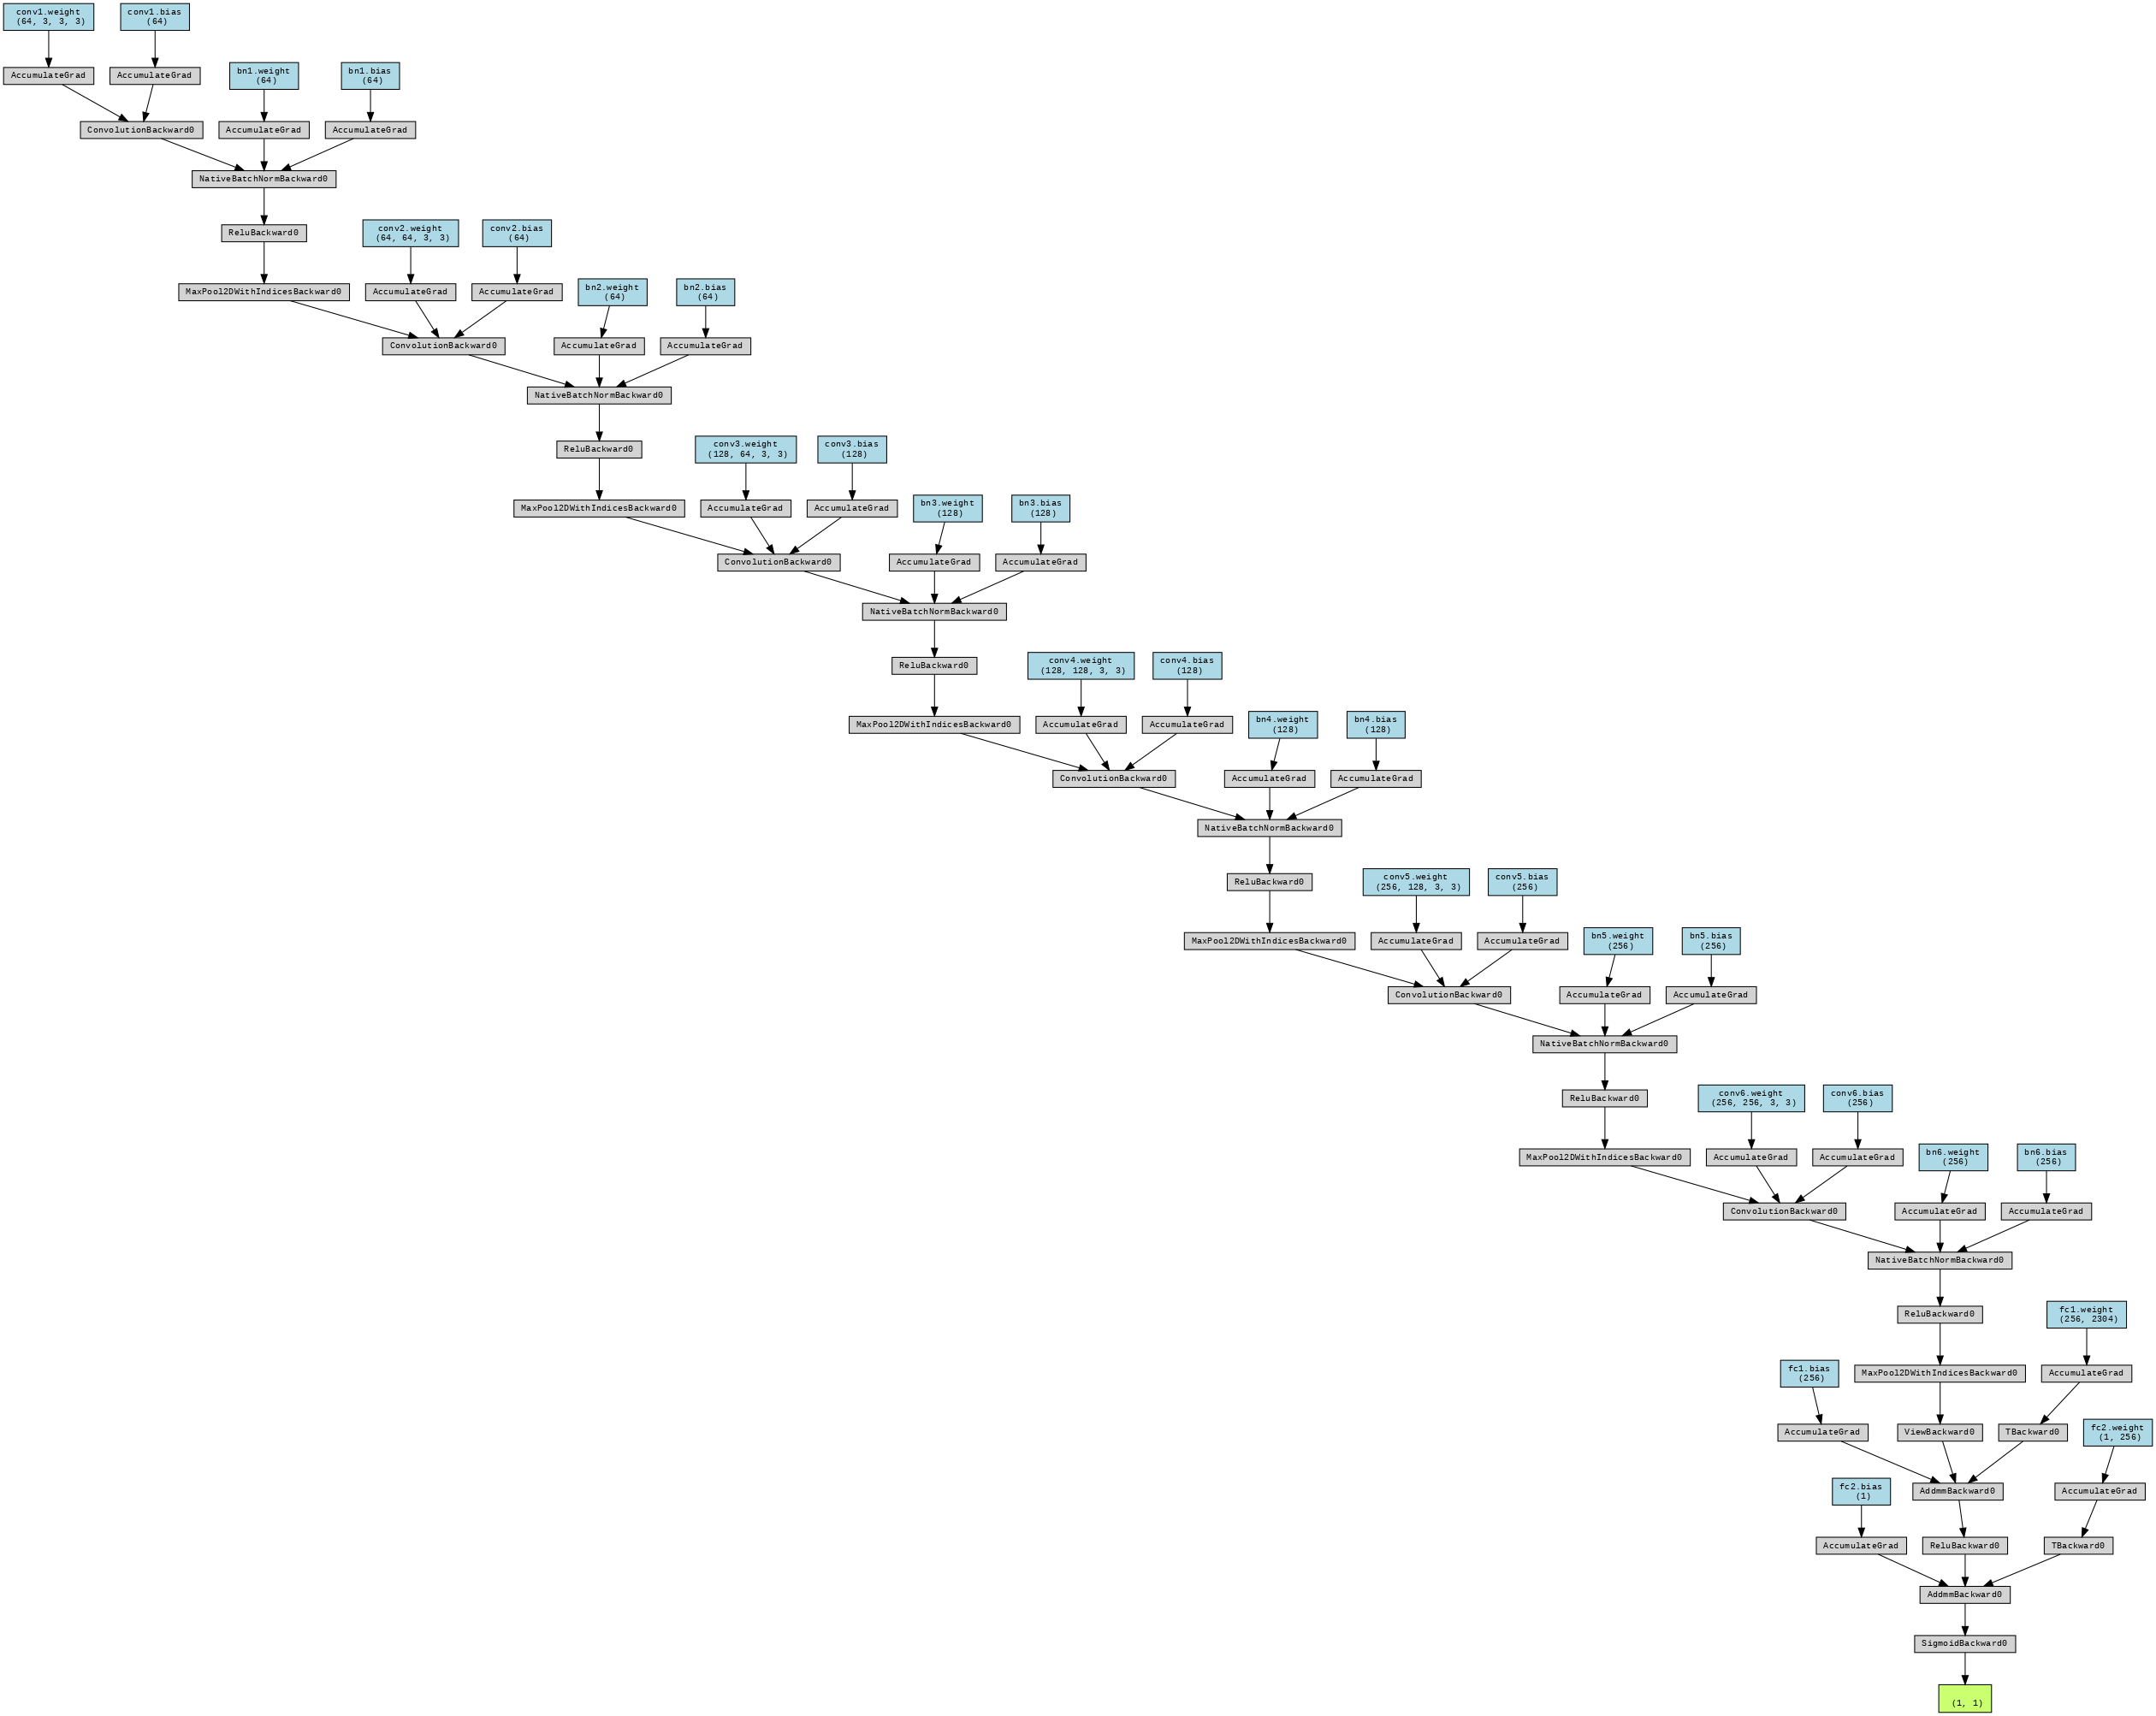

In [ ]:
model = CatDogClassifier()
dummy_input = torch.randn(1, 3, 250, 250)

output = model(dummy_input)

dot = make_dot(output, params=dict(model.named_parameters()))
dot.render("model_graph", format="png")
Image(filename="model_graph.png")

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CatDogClassifier().to(device)
device

device(type='cpu')

In [ ]:
# Loss function
criterion = nn.BCELoss()

# Optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

# LR Scheduler
scheduler = StepLR(optimizer, step_size=5, gamma=0.1)

In [ ]:
num_epochs = 5

accuracy_list = []
loss_list = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        optimizer.zero_grad()  # Clear previous gradients
        images, labels = images.to(device), labels.to(device).float()

        # Forward pass
        outputs = model(images).squeeze()  # Remove extra dimension
        loss = criterion(outputs, labels)  # Calculate loss

        # Backward pass and optimization
        loss.backward()        # Backpropagation
        optimizer.step()       # Update weights

        running_loss += loss.item()

        # Calculate accuracy
        predicted = (outputs > 0.5).float()  # Convert probabilities to binary (0 or 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = 100 * correct / total
    loss_list.append(epoch_loss)
    accuracy_list.append(epoch_accuracy)

    scheduler.step()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%")

Epoch [1/5], Loss: 0.1023, Accuracy: 96.11%
Epoch [2/5], Loss: 0.0703, Accuracy: 97.78%
Epoch [3/5], Loss: 0.0347, Accuracy: 99.03%
Epoch [4/5], Loss: 0.0229, Accuracy: 99.31%
Epoch [5/5], Loss: 0.0192, Accuracy: 99.58%


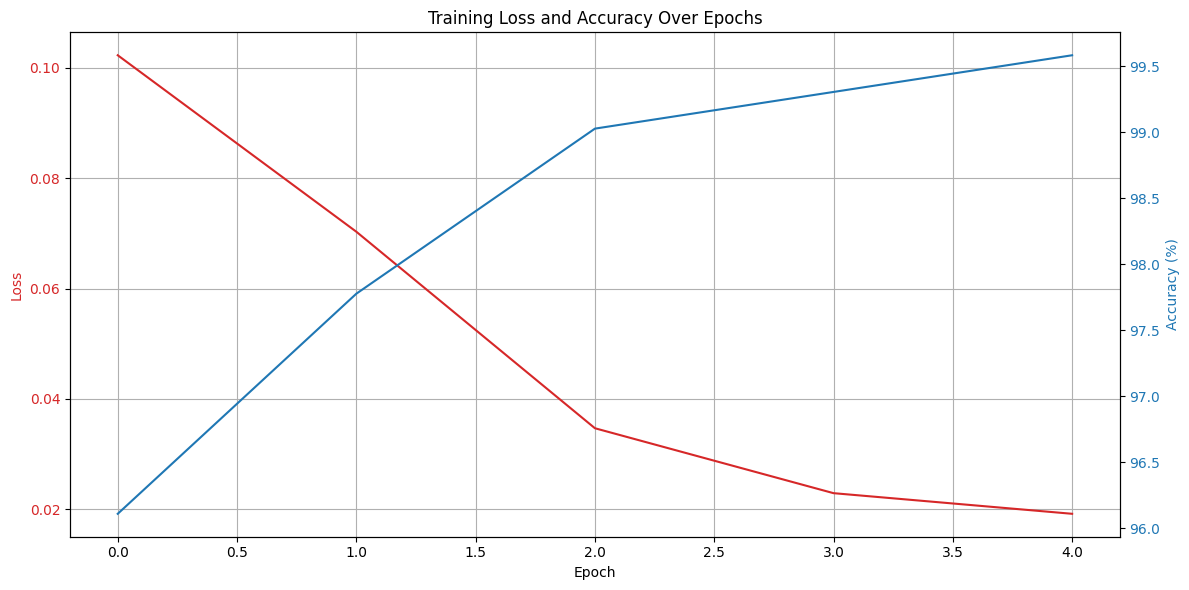

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:red'
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss', color=color)
ax1.plot(loss_list, label='Training Loss', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Accuracy (%)', color=color)
ax2.plot(accuracy_list, label='Training Accuracy', color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Training Loss and Accuracy Over Epochs')
fig.tight_layout()

plt.show()

In [ ]:
torch.save(model.state_dict(), 'cat_dog_classifier.pth')

In [ ]:
model = CatDogClassifier()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
model.load_state_dict(torch.load('cat_dog_classifier.pth'))
model.eval()

CatDogClassifier(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn5): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True,

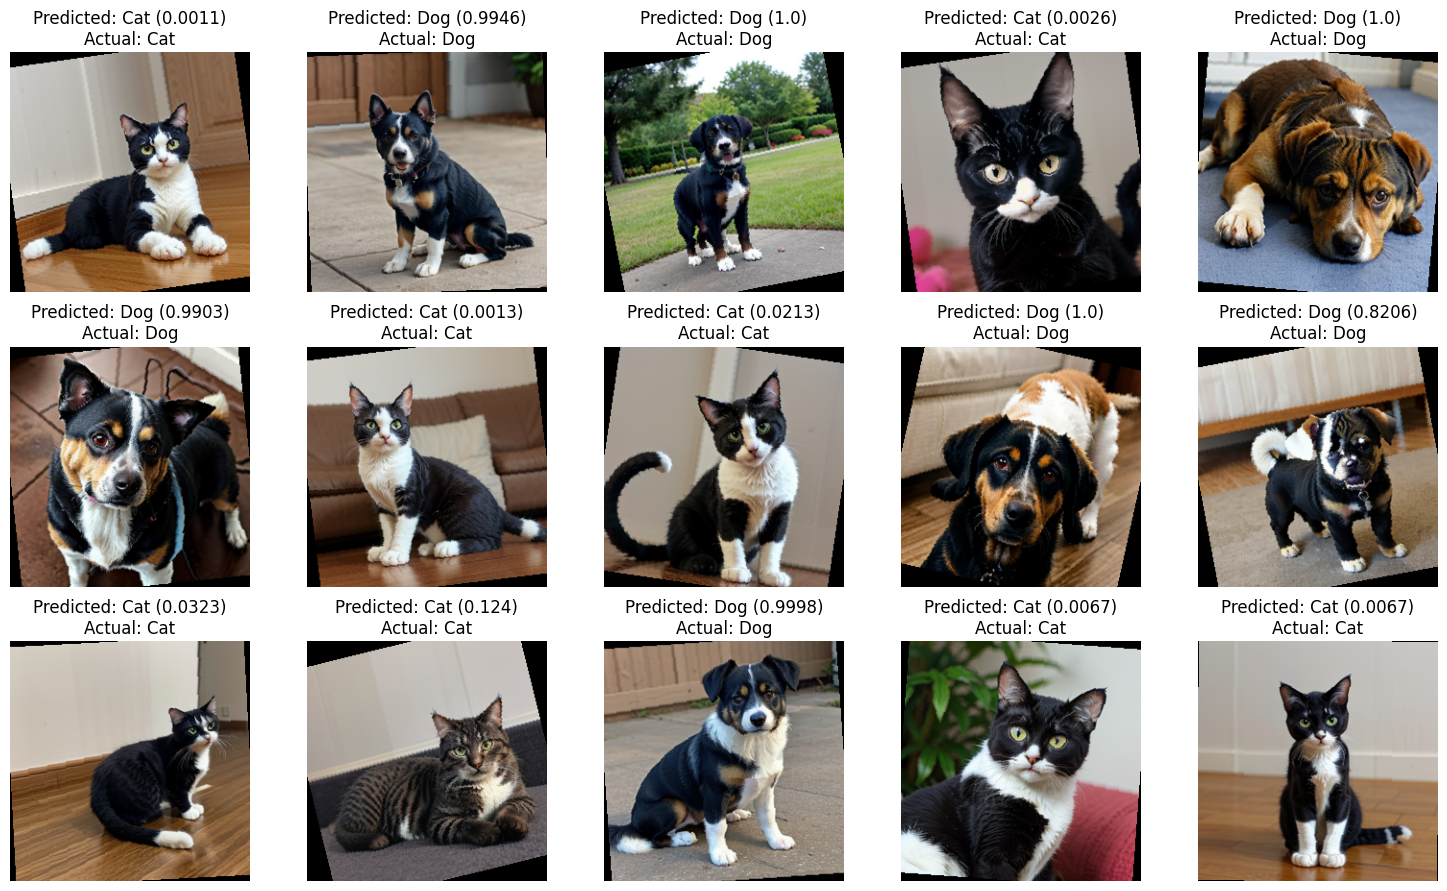

In [ ]:
def imshow(img, title=None):
    img = img.cpu().numpy().transpose((1, 2, 0))
    plt.imshow(img)
    if title:
        plt.title(title)
    plt.axis('off')

def run_model_on_batch(dataset):
    with torch.no_grad():
        for images, labels in dataset:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images).squeeze()
            predicted = (outputs > 0.5).float()

            plt.figure(figsize=(15, 9))
            for i in range(15):
                plt.subplot(3, 5, i + 1)
                imshow(images[i])

                pred_label = target_to_class[int(predicted[i].item())]
                true_label = target_to_class[int(labels[i].item())]

                output = round(outputs[i].item(), 4)

                plt.title(f'Predicted: {pred_label} ({output})\nActual: {true_label}')

            plt.tight_layout()
            plt.show()

            break

run_model_on_batch(test_loader)

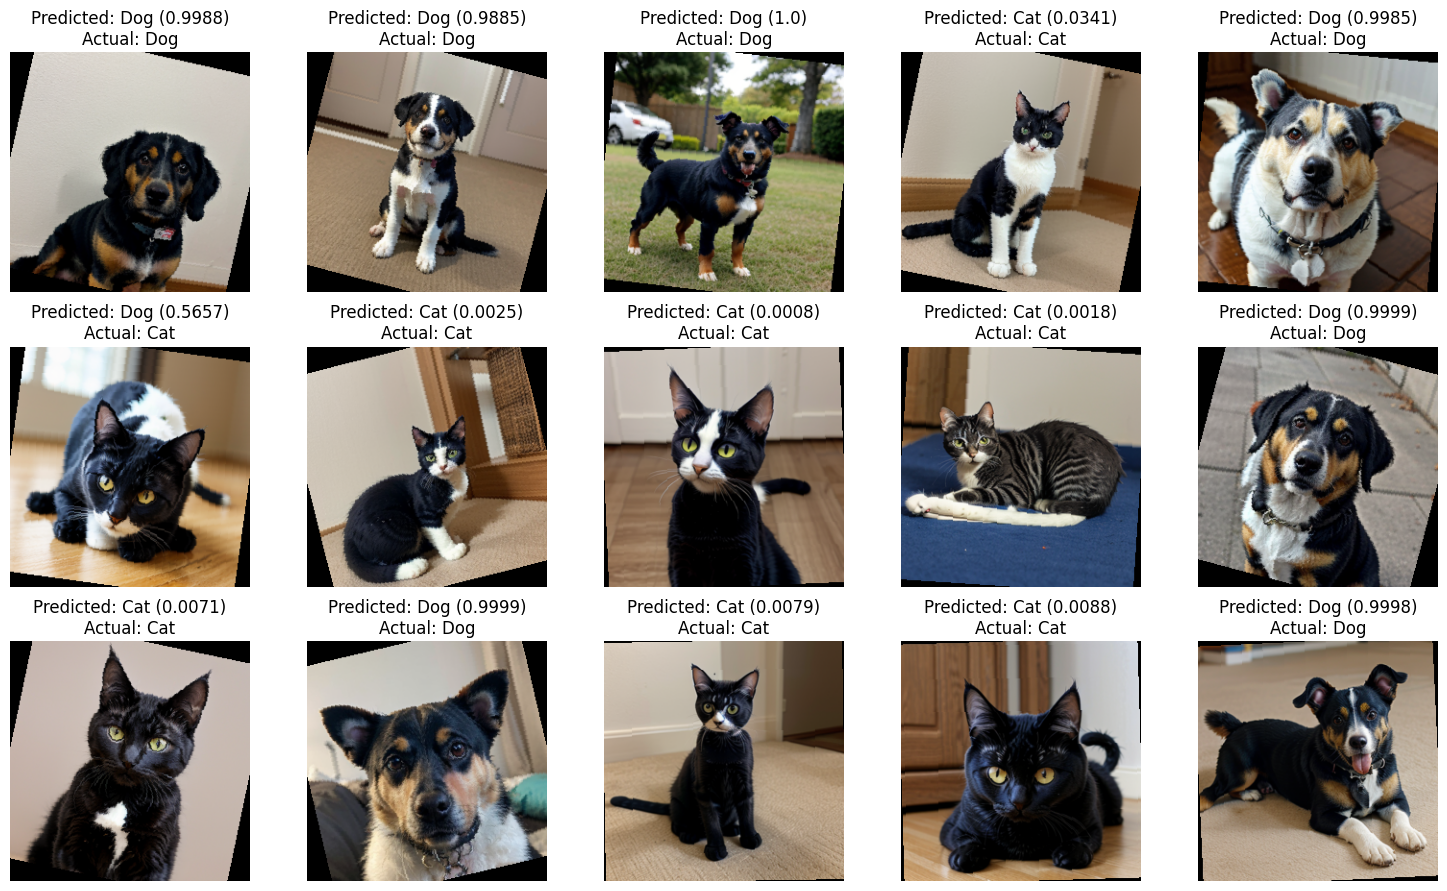

Accuracy: 98.50%


In [ ]:
correct = 0
total = 0

run_model_on_batch(eval_loader)

with torch.no_grad():
    for images, labels in eval_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images).squeeze()
        predicted = (outputs > 0.5).float()
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

accuracy = 100 * correct / total
print(f'Accuracy: {accuracy:.2f}%')